# Метод ближайших соседей

Для начала подключим библиотеки, которые нам понадобятся. Если библиотека не установлена, нужно выполнить команду:

!pip install <название библиотеки>

Например:

!pip install sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
data = pd.read_csv('D:\MLlabs\heart.csv', sep=',')
# Посмотрим на несколько записей из набора данных
data.head(10)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,very hard,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,male,hard,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,female,medium,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,male,medium,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,female,light,120,354,0,1,163,1,0.6,2,0,2,1
5,5,57,male,light,140,192,0,1,148,0,0.4,1,0,1,1
6,6,56,female,medium,140,294,0,0,153,0,1.3,1,0,2,1
7,7,44,male,medium,120,263,0,1,173,0,0.0,2,0,3,1
8,8,52,male,hard,172,199,1,1,162,0,0.5,2,0,3,1
9,9,57,male,hard,150,168,0,1,174,0,1.6,2,0,2,1


Этот набор данных - показатели физического здоровья пациентов. В нашей работе будем выполнять задачу бинарной классификации. Предскажем значение переменной 'target', которая означает, что у пациента имеются проблемы с сердцем.
Для начала приведем таблицу в удобоваримый вид.

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    object 
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


Выбросим за ненадобностью значения 'Unnamed: 0'

In [4]:
data = data.drop(['Unnamed: 0'], axis='columns')



In [5]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,very hard,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,hard,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,medium,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,medium,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,light,120,354,0,1,163,1,0.6,2,0,2,1
5,57,male,light,140,192,0,1,148,0,0.4,1,0,1,1
6,56,female,medium,140,294,0,0,153,0,1.3,1,0,2,1
7,44,male,medium,120,263,0,1,173,0,0.0,2,0,3,1
8,52,male,hard,172,199,1,1,162,0,0.5,2,0,3,1
9,57,male,hard,150,168,0,1,174,0,1.6,2,0,2,1


Посмотрим, можем ли мы выбросить еще какие-нибудь признаки из нашей таблицы. Это стоит делать, поскольку чем меньше признаков - тем легче вычислять расстояние между объектами, то есть алгоритм будет работать быстрее. Посмотрим на корреляцию признаков между собой. Построим графическое представление модуля значения корреляции попарно между признаками.

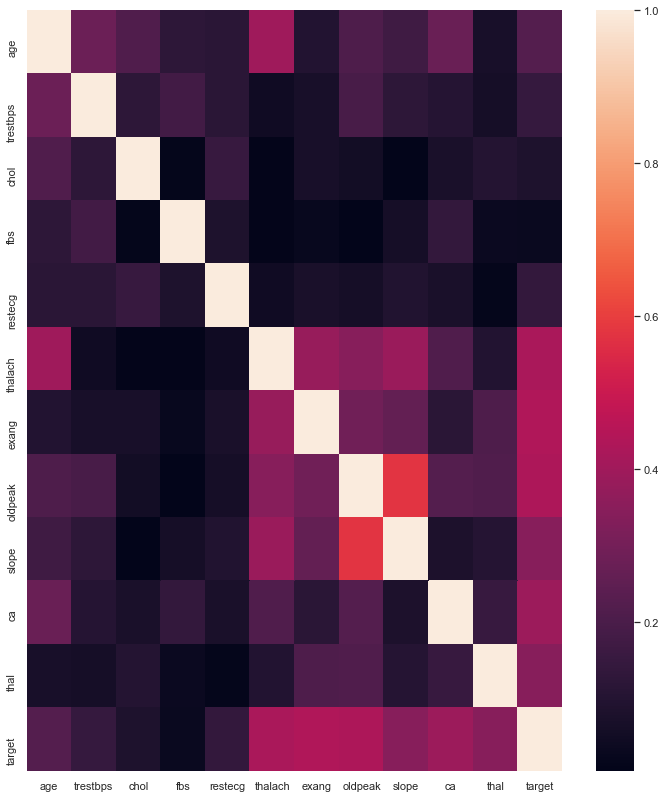

In [6]:
# Картинку отрисуем с помощью библиотеки seaborn
import seaborn as sns
# Подсчитаем корреляцию и возьмем модуль от нее
corr = data.corr().abs()
# Следующая команда устанавливает размер картинки (по умолчанию она довольно маленькая)
sns.set(rc={'figure.figsize':(12, 14)})
# Нарисуем картинку
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png)

Удалим из выборки признаки, высоко коррелирующие с другими признаками - 'oldpeak'

In [7]:
data = data.drop(['oldpeak'], axis='columns')

Посмотрим на признаки, которые остались после прореживания.

In [8]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,63,male,very hard,145,233,1,0,150,0,0,0,1,1
1,37,male,hard,130,250,0,1,187,0,0,0,2,1
2,41,female,medium,130,204,0,0,172,0,2,0,2,1
3,56,male,medium,120,236,0,1,178,0,2,0,2,1
4,57,female,light,120,354,0,1,163,1,2,0,2,1


Видим колонки текстовых переменных. Посмотрим, сколько всего таких - выведем типы данных в каждой колонке.

In [9]:
data.dtypes

age          int64
sex         object
cp          object
trestbps     int64
chol         int64
fbs          int64
restecg      int64
thalach      int64
exang        int64
slope        int64
ca           int64
thal         int64
target       int64
dtype: object

Текстовые признаки математическим методом не обработаешь. Посмотрим на значения, которые они принимают, чтобы придумать, что с ними делать.

In [10]:
data['sex'].value_counts()

male      207
female     96
Name: sex, dtype: int64

Заменим male на 1, а female на 0 

In [11]:
def gender_oppression(gender):
    if gender == 'male':
        return 1
    return 0

data['sex'] = data['sex'].apply(gender_oppression)

Посмотрим на полученные данные 

In [12]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,63,1,very hard,145,233,1,0,150,0,0,0,1,1
1,37,1,hard,130,250,0,1,187,0,0,0,2,1
2,41,0,medium,130,204,0,0,172,0,2,0,2,1
3,56,1,medium,120,236,0,1,178,0,2,0,2,1
4,57,0,light,120,354,0,1,163,1,2,0,2,1


Разберемся с колонкой cp

In [13]:
def chest(pain):
    if pain == 'light':
        return 0
    if pain == 'medium':
        return 1
    if pain == 'hard':
        return 2
    if pain == 'very hard':
        return 3
    return 4

data['cp'] = data['cp'].apply(chest)

In [14]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0,0,2,1
2,41,0,1,130,204,0,0,172,0,2,0,2,1
3,56,1,1,120,236,0,1,178,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,2,0,2,1


## Настало время machine learning

Выделим в нашей выборке целевую переменную, а также разделим ее на тренировочную и тестовую.

In [15]:
X = data[data.columns[:-1]]
y = data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

Пора заняться делом. Будем проводить классификацию с помощью метода ближайших соседей.

In [20]:
# импортируем класс классификатора по ближайшим соседям
from sklearn.neighbors import KNeighborsClassifier

# создадим наш классификатор. Гиперпараметр у этого алгоритма один - количество соседей.
clf = KNeighborsClassifier(n_neighbors=16)
# обучим классификатор на тренировочной выборке
clf.fit(X_train, y_train)
# подсчитаем долю верных ответов алгоритма на тестовой выборке.
# Есть и другие метрики качества - о них будет рассказано на следующей лабе
clf.score(X_test, y_test)

0.6842105263157895

Посмотрим, как влияет гиперпараметр на качество классификации.

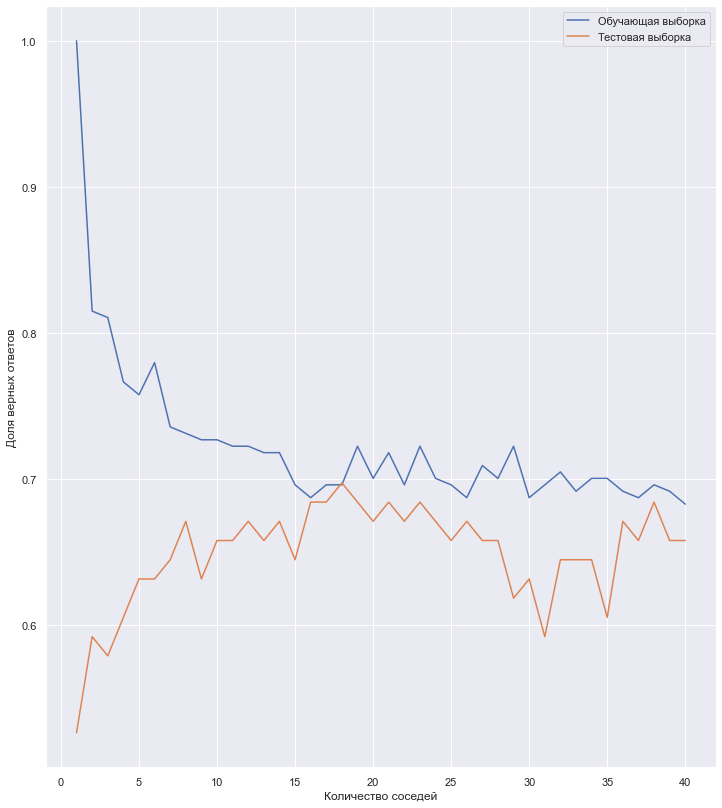

In [17]:
# Создадим пустой словарь. Будем добавлять в него значения наших "скоров". Ключами будет значение гиперпараметра,
# значениями - качество работы. Рассмотрим отдельно качество на тренировочной выборке и на тестовой.
train_scores = {}
test_scores = {}

# для n в диапазоне от 1 до 40 включительно
for n in range(1, 41):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    # значение качества на текущей итерации:
    current_train_score = clf.score(X_train, y_train)
    current_test_score = clf.score(X_test, y_test)
    # запишем его в наши словари
    train_scores[n] = current_train_score
    test_scores[n] = current_test_score

# нарисуем графики

plt.plot(list(train_scores.keys()), list(train_scores.values()), label='Обучающая выборка')
plt.plot(list(test_scores.keys()), list(test_scores.values()), label='Тестовая выборка')
plt.xlabel('Количество соседей')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


Исходя из полученных данных, можно сделать вывод, что при количестве соседей 16 мы получаем наилучшую точность